In [54]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [52]:
data = pd.read_csv("C:/Users/docum/Downloads/spam.csv", encoding='latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc

In [5]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, cmap="Blues", cbar=False, ax=ax)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [8]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
data.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [10]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: >

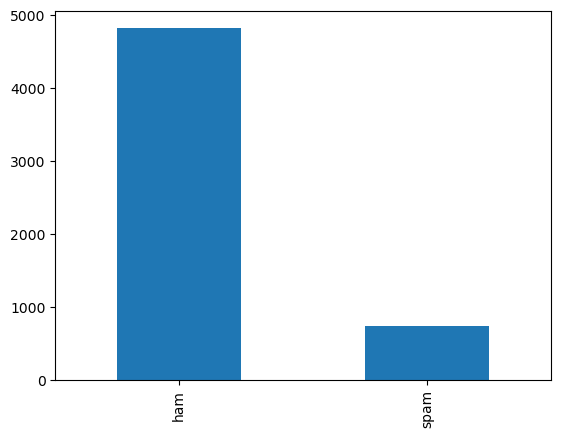

In [12]:
data.label.value_counts().plot.bar()

In [13]:
data['spam'] = data['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head(15)

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [14]:
data['length'] = data['text'].apply(len)

In [15]:
data.head(10)

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


(-40.0, 950.0)

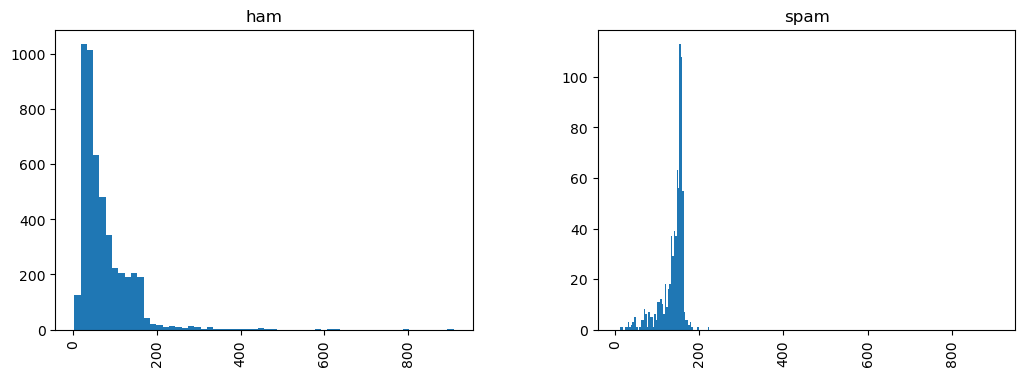

In [17]:
data.hist(column='length',by='label',bins=60,figsize=(12,4))
plt.xlim(-40,950)

In [18]:
data_ham  = data[data['spam'] == 0].copy()
data_spam = data[data['spam'] == 1].copy()

In [19]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS) 
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuation_and_stopwords(sms):    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()    
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

In [26]:
from collections import Counter

In [29]:
words_data_ham = data_ham['text'].tolist()
words_data_spam = data_spam['text'].tolist()

In [30]:
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [31]:
list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [32]:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, ' '),
  Text(1, 0, 'e'),
  Text(2, 0, 'o'),
  Text(3, 0, 't'),
  Text(4, 0, 'a'),
  Text(5, 0, 'n'),
  Text(6, 0, 'i'),
  Text(7, 0, 's'),
  Text(8, 0, 'r'),
  Text(9, 0, 'l'),
  Text(10, 0, 'h'),
  Text(11, 0, '.'),
  Text(12, 0, 'u'),
  Text(13, 0, 'd'),
  Text(14, 0, 'y'),
  Text(15, 0, 'm'),
  Text(16, 0, 'g'),
  Text(17, 0, 'w'),
  Text(18, 0, 'c'),
  Text(19, 0, 'p'),
  Text(20, 0, 'f'),
  Text(21, 0, 'b'),
  Text(22, 0, 'k'),
  Text(23, 0, 'I'),
  Text(24, 0, 'v'),
  Text(25, 0, "'"),
  Text(26, 0, ','),
  Text(27, 0, '?'),
  Text(28, 0, 'A'),
  Text(29, 0, 'T')])

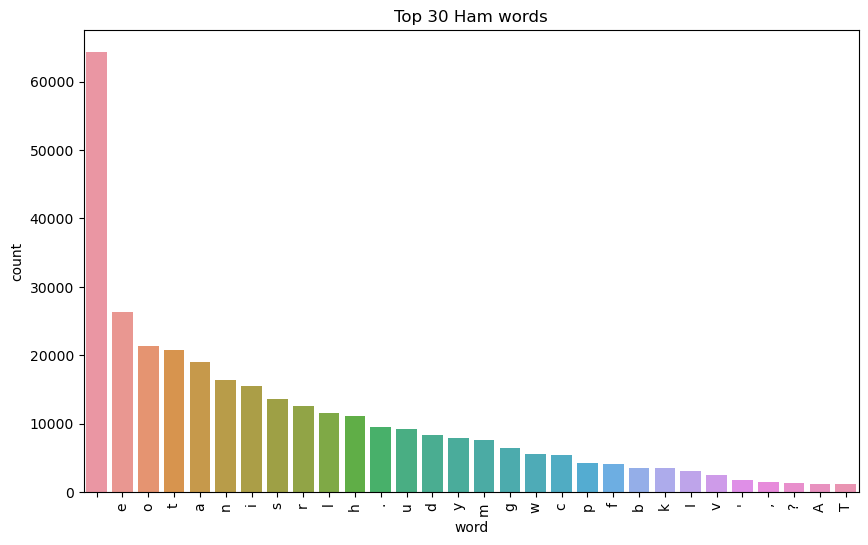

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, ' '),
  Text(1, 0, 'e'),
  Text(2, 0, 'o'),
  Text(3, 0, 't'),
  Text(4, 0, 'a'),
  Text(5, 0, 'r'),
  Text(6, 0, 'n'),
  Text(7, 0, 'i'),
  Text(8, 0, 's'),
  Text(9, 0, 'l'),
  Text(10, 0, '0'),
  Text(11, 0, 'c'),
  Text(12, 0, 'u'),
  Text(13, 0, 'd'),
  Text(14, 0, 'm'),
  Text(15, 0, 'p'),
  Text(16, 0, '1'),
  Text(17, 0, 'h'),
  Text(18, 0, '.'),
  Text(19, 0, 'w'),
  Text(20, 0, 'y'),
  Text(21, 0, '2'),
  Text(22, 0, '8'),
  Text(23, 0, 'T'),
  Text(24, 0, 'g'),
  Text(25, 0, '5'),
  Text(26, 0, 'f'),
  Text(27, 0, 'E'),
  Text(28, 0, 'b'),
  Text(29, 0, 'C')])

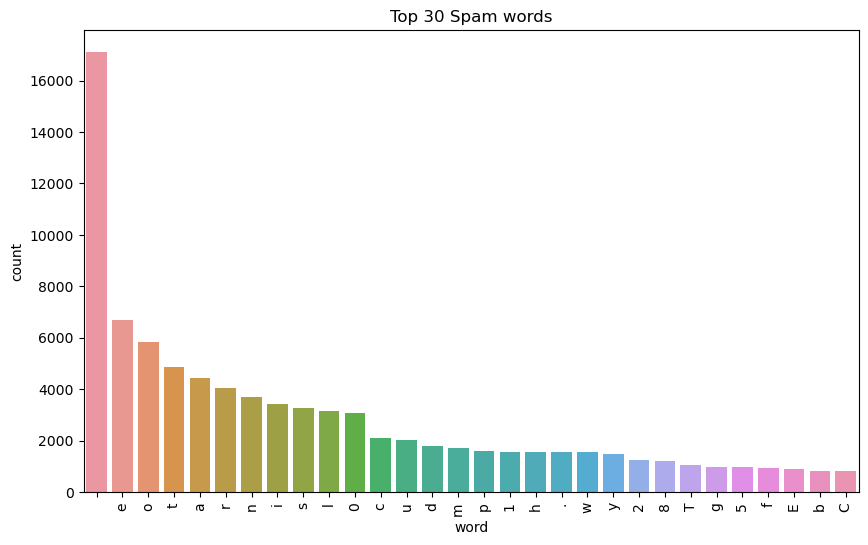

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical')

In [37]:
fdist_ham  = nltk.FreqDist(list_ham_words)
fdist_spam = nltk.FreqDist(list_spam_words)

In [38]:
df_hamwords_top30_nltk  = pd.DataFrame(fdist_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30_nltk = pd.DataFrame(fdist_spam.most_common(30), columns=['word', 'count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, ' '),
  Text(1, 0, 'e'),
  Text(2, 0, 'o'),
  Text(3, 0, 't'),
  Text(4, 0, 'a'),
  Text(5, 0, 'n'),
  Text(6, 0, 'i'),
  Text(7, 0, 's'),
  Text(8, 0, 'r'),
  Text(9, 0, 'l'),
  Text(10, 0, 'h'),
  Text(11, 0, '.'),
  Text(12, 0, 'u'),
  Text(13, 0, 'd'),
  Text(14, 0, 'y'),
  Text(15, 0, 'm'),
  Text(16, 0, 'g'),
  Text(17, 0, 'w'),
  Text(18, 0, 'c'),
  Text(19, 0, 'p'),
  Text(20, 0, 'f'),
  Text(21, 0, 'b'),
  Text(22, 0, 'k'),
  Text(23, 0, 'I'),
  Text(24, 0, 'v'),
  Text(25, 0, "'"),
  Text(26, 0, ','),
  Text(27, 0, '?'),
  Text(28, 0, 'A'),
  Text(29, 0, 'T')])

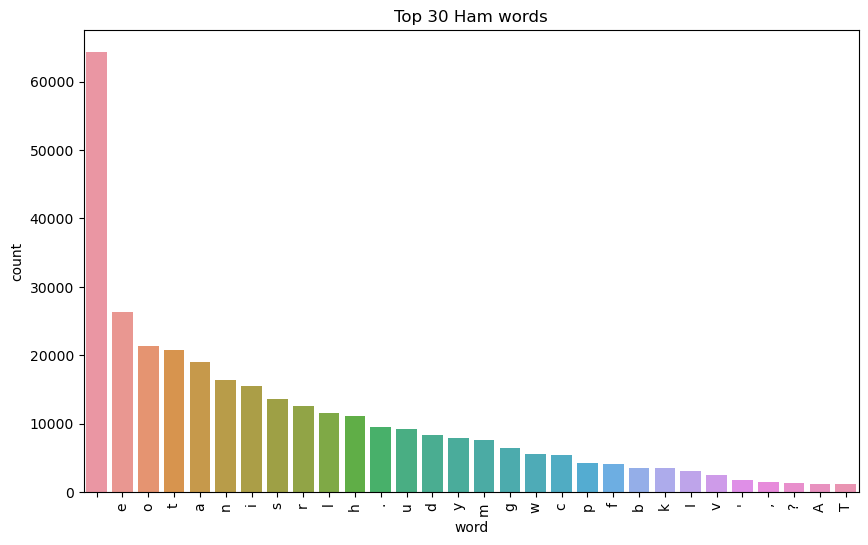

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',data=df_hamwords_top30_nltk, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, ' '),
  Text(1, 0, 'e'),
  Text(2, 0, 'o'),
  Text(3, 0, 't'),
  Text(4, 0, 'a'),
  Text(5, 0, 'r'),
  Text(6, 0, 'n'),
  Text(7, 0, 'i'),
  Text(8, 0, 's'),
  Text(9, 0, 'l'),
  Text(10, 0, '0'),
  Text(11, 0, 'c'),
  Text(12, 0, 'u'),
  Text(13, 0, 'd'),
  Text(14, 0, 'm'),
  Text(15, 0, 'p'),
  Text(16, 0, '1'),
  Text(17, 0, 'h'),
  Text(18, 0, '.'),
  Text(19, 0, 'w'),
  Text(20, 0, 'y'),
  Text(21, 0, '2'),
  Text(22, 0, '8'),
  Text(23, 0, 'T'),
  Text(24, 0, 'g'),
  Text(25, 0, '5'),
  Text(26, 0, 'f'),
  Text(27, 0, 'E'),
  Text(28, 0, 'b'),
  Text(29, 0, 'C')])

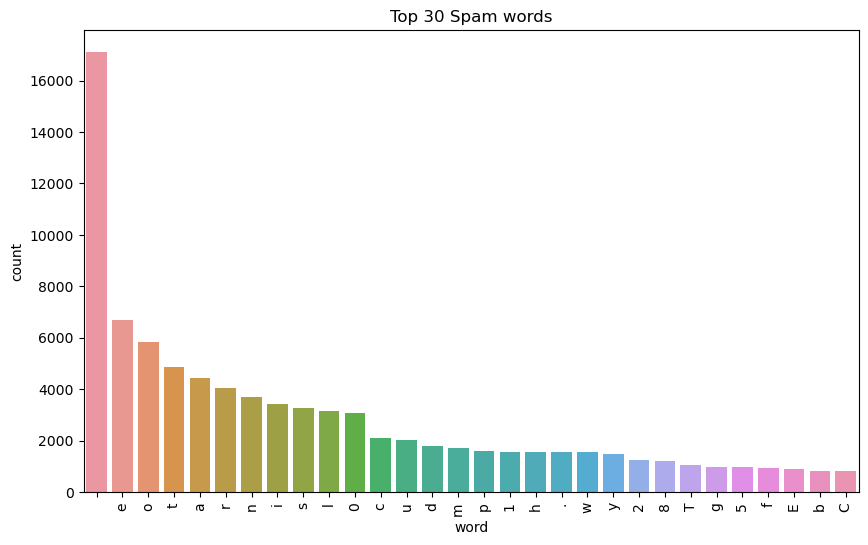

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',data=df_spamwords_top30_nltk, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical')